# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [11]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [12]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Singapore to Heathrow. Busine...
1,Not Verified | I reported my damaged/ruined ...
2,"Not Verified | On March 1st, I flew from Ber..."
3,Not Verified | The WORST customer experience! ...
4,Not Verified | Had to cancel my flight month...


In [13]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [14]:
# Step 1: Remove leading/trailing whitespace
df['reviews'] = df['reviews'].str.strip()

# Step 2: Separate verification status
df['verification_status'] = df['reviews'].apply(lambda x: 'Trip Verified' if 'Trip Verified' in x else 'Not Verified')

# Step 3: Extract review content
df['review_content'] = df['reviews'].apply(lambda x: x.split('|', 1)[1].strip())

# Drop the original reviews column
df.drop(columns=['reviews'], inplace=True)

In [15]:
df.head()

,verification_status,review_content
0,Not Verified,Singapore to Heathrow. Business class on an A3...
1,Not Verified,I reported my damaged/ruined suitcase 5 weeks ...
2,Not Verified,"On March 1st, I flew from Berlin to São Paulo ..."
3,Not Verified,The WORST customer experience! British Airways...
4,Not Verified,Had to cancel my flight months in advance due ...


In [16]:
# Library for text processing
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# Stop words list
stop_words =    set(stopwords.words('english'))

In [48]:
def preprocess(sentence):
    word_token = word_tokenize(sentence)
    #clean stopword
    cleaned_text = [word for word in word_token if word.lower() not in stop_words]
    return ' '.join(cleaned_text)

In [49]:
df['cleaned_review'] = df['review_content'].apply(preprocess)

In [51]:
df.head()

,verification_status,review_content,cleaned_review,sentiment_w_stopwords,sentiment_wo_stopwords
0,Not Verified,Singapore to Heathrow. Business class on an A3...,Singapore Heathrow . Business class A380-800 P...,-0.174722,-0.298810
1,Not Verified,I reported my damaged/ruined suitcase 5 weeks ...,reported damaged/ruined suitcase 5 weeks ago '...,-0.316667,-0.116667
2,Not Verified,"On March 1st, I flew from Berlin to São Paulo ...","March 1st , flew Berlin São Paulo BA encounter...",0.028333,-0.042143
3,Not Verified,The WORST customer experience! British Airways...,WORST customer experience ! British Airways ( ...,0.021528,0.021528
4,Not Verified,Had to cancel my flight months in advance due ...,cancel flight months advance due change schedu...,0.112500,0.135000


# Sentiment analysis

In [25]:
from textblob import TextBlob

In [26]:
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

In [52]:
df['sentiment_w_stopwords'] = df['review_content'].apply(get_sentiment)
df['sentiment_wo_stopwords'] = df['cleaned_review'].apply(get_sentiment)

In [53]:
df.head()

,verification_status,review_content,cleaned_review,sentiment_w_stopwords,sentiment_wo_stopwords
0,Not Verified,Singapore to Heathrow. Business class on an A3...,Singapore Heathrow . Business class A380-800 P...,-0.174722,-0.298810
1,Not Verified,I reported my damaged/ruined suitcase 5 weeks ...,reported damaged/ruined suitcase 5 weeks ago '...,-0.316667,-0.116667
2,Not Verified,"On March 1st, I flew from Berlin to São Paulo ...","March 1st , flew Berlin São Paulo BA encounter...",0.028333,-0.042143
3,Not Verified,The WORST customer experience! British Airways...,WORST customer experience ! British Airways ( ...,0.021528,0.021528
4,Not Verified,Had to cancel my flight months in advance due ...,cancel flight months advance due change schedu...,0.112500,0.135000


In [54]:
df.describe()

,sentiment_w_stopwords,sentiment_wo_stopwords
count,1000.000000,1000.000000
mean,0.060669,0.065217
std,0.199542,0.217002
min,-0.766667,-1.000000
25%,-0.053720,-0.060212
50%,0.045994,0.052031
75%,0.177238,0.195114
max,0.715000,0.800000


In [78]:
# Most negetive polarity score
print(df['review_content'][df['sentiment_wo_stopwords'] == -1])

196    8 months have passed and still wasting my time with the BA team sharing the same documents again and again. Our flight from Delhi to London got delayed in December 2022 so we missed the connecting flight from London Heathrow to Vancouver. BA put us on a flight after 24 hours. On reaching Vancouver we were told our baggage was lost. Such a horrible experience and their Customer Relations person did not even look into the details already shared in December, January, April, and July.
Name: review_content, dtype: object


In [70]:
# Most positive polarity score
df['review_content'][df['sentiment_w_stopwords'] == 0.8]


458    For this 5 hour 15 min flight, you are given a bag of potato chips, and a bottle of water. If you want to purchase more food and drink you do this via their app on your phone. Or like me you can pre-order weeks before you fly. However there is no guarantee you will get your order, mine never came, so after enquiring where the order was, they told me they had food for someone who was not on the plane, that someone was me it turned out. They also managed to lose my luggage.  I am still waiting for them to contact me regarding it. I will never use them again.
Name: review_content, dtype: object

In [84]:
def label_sentence(score):
    if score > 0:
        return 'Positive'
    elif score < 0 :
        return 'Negative'
    else :
        return 'Neutral'

In [85]:
df['label'] = df['sentiment_wo_stopwords'].apply(label_sentence)

In [87]:
# Calculate the proportion of each label
label_counts = df['label'].value_counts(normalize=True) * 100

print(label_counts)

label
Positive    63.1
Negative    35.4
Neutral      1.5
Name: proportion, dtype: float64


# Top 10 most frequency words in both positive and negative sentiment score

In [30]:
from collections import Counter

# Find top 10 fequency words in Positive and Negative sentence
positive_word_counter = Counter()
negative_word_counter = Counter()
neutral_word_counter = Counter()

for idx, row in df.iterrows():
    blob = TextBlob(row['cleaned_review'])
    words = blob.words
    for word in words:
        lower_word = word.lower()
        if row['sentiment_wo_stopwords']> 0:
            positive_word_counter[lower_word] += 1
        elif row['sentiment_wo_stopwords'] < 0:
            negative_word_counter[lower_word] += 1
        else :
            neutral_word_counter[lower_word] += 1


In [81]:
positive_word_counter_df = pd.DataFrame(positive_word_counter.items(),columns=['Word','Frequency']).sort_values(by='Frequency',ascending=False)
negative_word_counter_df = pd.DataFrame(negative_word_counter.items(),columns=['Word','Frequency']).sort_values(by='Frequency',ascending=False)
neutral_word_counter_df = pd.DataFrame(neutral_word_counter.items(),columns=['Word','Frequency']).sort_values(by='Frequency',ascending=False)

In [79]:
positive_word_counter_df.head(10)


,Word,Frequency
25,flight,1288
5,ba,852
52,service,471
104,good,396
114,time,391
16,’,381
142,crew,356
255,food,315
505,london,311
170,seat,307


In [80]:
negative_word_counter_df.head(10)

,Word,Frequency
117,flight,646
89,ba,427
91,service,255
18,’,212
123,london,188
472,us,183
119,hours,174
97,british,161
3,class,158
281,one,155


In [82]:
neutral_word_counter_df.head()

,Word,Frequency
0,flight,16
24,ba,13
76,luggage,9
38,seat,8
40,london,8


In [39]:
import matplotlib.pyplot as plt

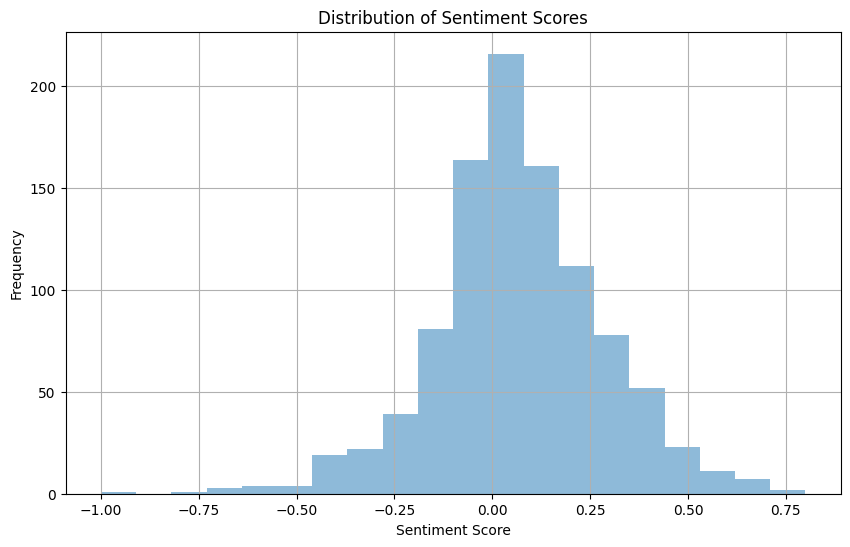

In [41]:
# Generate a histogram of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_wo_stopwords'], bins=20, alpha = 0.5)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [42]:
import numpy as np

In [43]:
print(f"Average sentiment scores : {np.mean(df['sentiment_wo_stopwords']):.05f}")

Average sentiment scores : 0.06522


# Wordcloud analysis

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [45]:
all_reviews = ' '.join(df['review_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

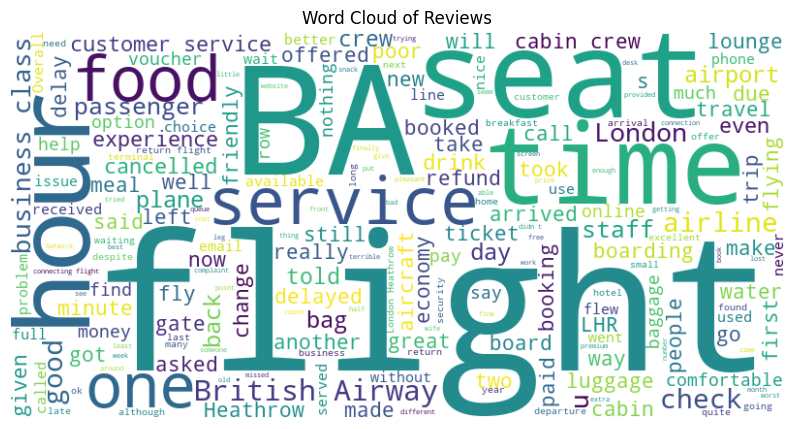

In [46]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()